In [20]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import configs
import os
from scipy.stats import sem
import matplotlib.cm as cm

In [21]:
plt.rcParams['font.family'] = 'sans-serif'

# Helper functions

In [22]:
def smooth(xs, ys, degree=8):
    poly = np.polyfit(xs, ys, degree)
    poly_y = np.poly1d(poly)(xs)
    return poly_y

def smooth(xs, ys):
    from scipy.signal import lfilter
    n = 5             # larger n gives smoother curves
    b = [1.0 / n] * n  # numerator coefficients
    a = 1              # denominator coefficient
    y_lf = lfilter(b, a, ys)
    return y_lf

def smooth(xs, ys, n=3):
    return np.convolve(ys, np.ones(n)/n, mode='same')

In [23]:
def get_df(pfiles):
    _results = {
        'dimensionality_tracking': [],
        'valid_scores': [], 'valid_steps': [],
        'fname': []
        }
    for pfile in pfiles:
        with open(pfile, 'rb') as f:
            results = pickle.load(f)
        n_fname = len(results['fname'])
        n_scores = len(results['valid_scores'])
        valid_steps_present = 'valid_steps' in results.keys()
        multiple = int(n_fname/n_scores)
        if n_fname % n_scores != 0:
            print('ERROR')
            print(pfile)
        idxs = np.arange(n_scores)
        for idx in idxs:
            _results['dimensionality_tracking'].append(
                results['dimensionality_tracking'][idx])
            _results['valid_scores'].append(
                results['valid_scores'][idx])
            _results['fname'].append(
                results['fname'][idx*multiple])
            if valid_steps_present:
                _results['valid_steps'].append(
                    results['valid_steps'][idx])
            else:
                _results['valid_steps'].append(
                    [0]*len(results['valid_scores'][idx]))
    results = _results

    data = {'scores': [], 'steps': [], 'epochs': [], 'fname': []}
    for idx in range(len(results['valid_scores'])):
        valid_score = results['valid_scores'][idx]
        valid_step = results['valid_steps'][idx]
        fname = results['fname'][idx]
#         if fname.endswith('mb_only'):
#             fname = 'MB only'
#         elif 'mb' in fname:
#             fname = 'MB + Entropy'
#         elif 'mf' in fname:
#             fname = 'MF Only'
#         elif 'entro' in fname:
#             fname = 'Entropy'
#         elif 'clean' in fname:
#             fname = 'Random'
#         elif '_sr_' in fname:
#             fname = f'SR $\gamma={fname[-3:]}$'
        for epoch in range(len(valid_score)):
            data['scores'].append(valid_score[epoch])
            data['epochs'].append(epoch)
            data['fname'].append(fname)
            data['steps'].append(valid_step[epoch])
    df = pd.DataFrame(data)
    return df

# Foraging

In [24]:
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/'

In [94]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/continual6x6_pt2_dm_dim7/'
pickle_dir = f'{engram_dir}pickles/frozentransfer_test_sweep_dm_dim9/'
pickle_dir = f'{engram_dir}pickles/frozentransfer_ccn_Tsweep_dm_dim14/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(pfiles)

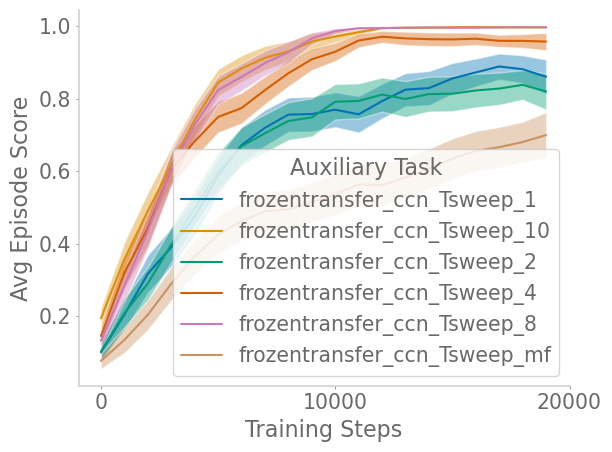

In [95]:
new_df = df.copy()
smooth_line = True
new_df['epochs'] = new_df['epochs']//2*2
epochs = np.unique(new_df['epochs'])
fig, ax = plt.subplots()
for fname_idx, fname in enumerate(
    np.unique(new_df['fname'])
    #['MF Only', 'Entropy', 'MB + Entropy']
    ):
    means = []
    sems = []
    for epoch in epochs:
        vals = new_df[(new_df['fname']==fname) & (new_df['epochs']==epoch)]
        vals = vals['scores']
        means.append(np.mean(vals))
        sems.append(sem(vals))
    means = np.array(means)
    sems = np.array(sems)
    mean_lowerbound = means - sems
    mean_upperbound = means + sems
    if smooth_line:
        means = smooth(epochs, means, 3)
        mean_lowerbound = smooth(epochs, mean_lowerbound)
        mean_upperbound = smooth(epochs, mean_upperbound)
    ax.plot(epochs[:-1]*500, means[:-1], label=fname)
    ax.fill_between(epochs[:-1]*500, mean_lowerbound[:-1], mean_upperbound[:-1], alpha=0.4)
plt.ylabel('Avg Episode Score')
plt.xlabel('Training Steps')
plt.xticks([0, 10000, 20000])
plt.legend(title='Auxiliary Task')
plt.tight_layout()
plt.savefig('foraging.png', dpi=300, transparent=True)
plt.show()

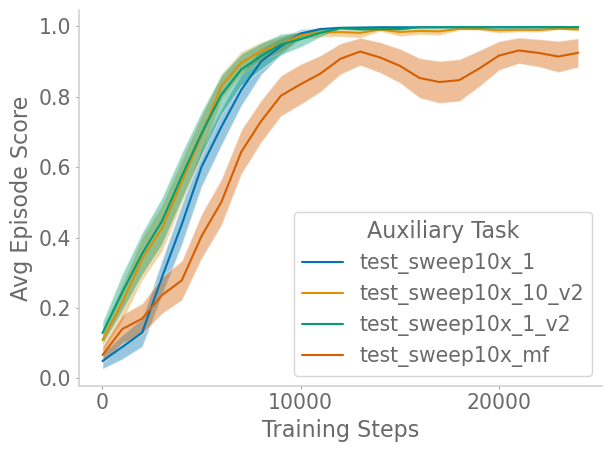

In [53]:
new_df = df.copy()
smooth_line = True
new_df['epochs'] = new_df['epochs']//2*2
epochs = np.unique(new_df['epochs'])
fig, ax = plt.subplots()
for fname_idx, fname in enumerate(
    np.unique(new_df['fname'])
    #['MF Only', 'Entropy', 'MB + Entropy']
    ):
    means = []
    sems = []
    for epoch in epochs:
        vals = new_df[(new_df['fname']==fname) & (new_df['epochs']==epoch)]
        vals = vals['scores']
        means.append(np.mean(vals))
        sems.append(sem(vals))
    means = np.array(means)
    sems = np.array(sems)
    mean_lowerbound = means - sems
    mean_upperbound = means + sems
    if smooth_line:
        means = smooth(epochs, means, 3)
        mean_lowerbound = smooth(epochs, mean_lowerbound)
        mean_upperbound = smooth(epochs, mean_upperbound)
    ax.plot(epochs[:-1]*500, means[:-1], label=fname)
    ax.fill_between(epochs[:-1]*500, mean_lowerbound[:-1], mean_upperbound[:-1], alpha=0.4)
plt.ylabel('Avg Episode Score')
plt.xlabel('Training Steps')
plt.xticks([0, 10000, 20000])
plt.legend(title='Auxiliary Task')
plt.tight_layout()
plt.savefig('foraging.png', dpi=300, transparent=True)
plt.show()

In [269]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/frozentransfer_foragingT1_dm_dim6/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(pfiles)

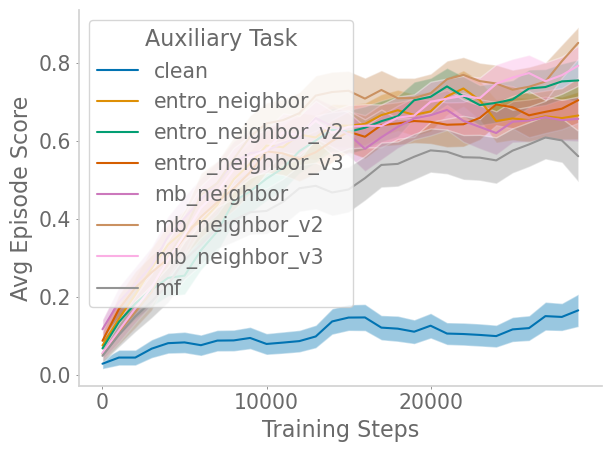

In [274]:
new_df = df.copy()
smooth_line = True
new_df['epochs'] = new_df['epochs']//2*2
epochs = np.unique(new_df['epochs'])
fig, ax = plt.subplots()
for fname_idx, fname in enumerate(
    np.unique(new_df['fname'])
    #['MF Only', 'Entropy', 'MB + Entropy']
    ):
    means = []
    sems = []
    for epoch in epochs:
        vals = new_df[(new_df['fname']==fname) & (new_df['epochs']==epoch)]
        vals = vals['scores']
        means.append(np.mean(vals))
        sems.append(sem(vals))
    means = np.array(means)
    sems = np.array(sems)
    mean_lowerbound = means - sems
    mean_upperbound = means + sems
    if smooth_line:
        means = smooth(epochs, means, 3)
        mean_lowerbound = smooth(epochs, mean_lowerbound)
        mean_upperbound = smooth(epochs, mean_upperbound)
    ax.plot(epochs[:-1]*500, means[:-1], label=fname[26:])
    ax.fill_between(epochs[:-1]*500, mean_lowerbound[:-1], mean_upperbound[:-1], alpha=0.4)
plt.ylabel('Avg Episode Score')
plt.xlabel('Training Steps')
plt.xticks([0, 10000, 20000])
plt.legend(title='Auxiliary Task')
plt.tight_layout()
plt.savefig('foraging.png', dpi=300)
plt.show()

# Foraging Transfer

In [316]:
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/'

In [317]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/frozentransfer_foragingF1_dm_dim6/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(pfiles)

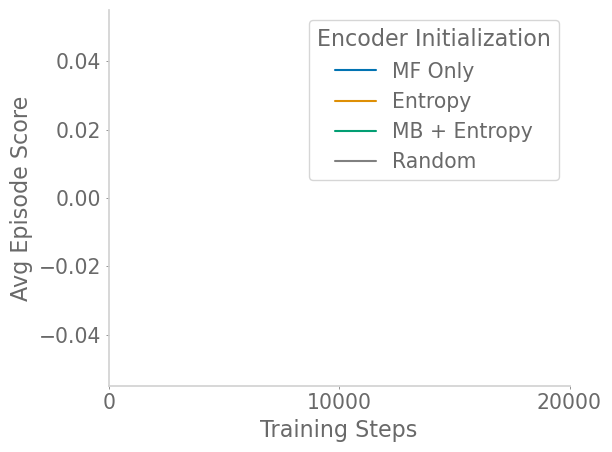

In [318]:
new_df = df.copy()
smooth_line = True
new_df['epochs'] = new_df['epochs']//2*2
epochs = np.unique(new_df['epochs'])
fig, ax = plt.subplots()
colors = ['C0', 'C1', 'C2', 'gray']
for fname_idx, fname in enumerate(
    ['MF Only', 'Entropy', 'MB + Entropy', 'Random']
    ):
    means = []
    sems = []
    for epoch in epochs:
        vals = new_df[(new_df['fname']==fname) & (new_df['epochs']==epoch)]
        vals = vals['scores']
        means.append(np.mean(vals))
        sems.append(sem(vals))
    means = np.array(means)
    sems = np.array(sems)
    mean_lowerbound = means - sems
    mean_upperbound = means + sems
    if smooth_line:
        means = smooth(epochs, means, 3)
        mean_lowerbound = smooth(epochs, mean_lowerbound)
        mean_upperbound = smooth(epochs, mean_upperbound)
    ax.plot(epochs[:-1]*500, means[:-1], label=fname, color=colors[fname_idx])
    ax.fill_between(
        epochs[:-1]*500, mean_lowerbound[:-1], mean_upperbound[:-1],
        alpha=0.4, color=colors[fname_idx])
plt.ylabel('Avg Episode Score')
plt.xlabel('Training Steps')
plt.xticks([0, 10000, 20000])
plt.legend(title='Encoder Initialization')
plt.tight_layout()
plt.savefig('foraging_transfer.png', dpi=300)
plt.show()

# SR Foraging

In [2]:
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/'

In [96]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/transfer_srSize_dm_dim28/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(pfiles)

In [97]:
np.unique(df['fname'])

array(['Entropy', 'None', 'SR $\\gamma=.93$'], dtype=object)

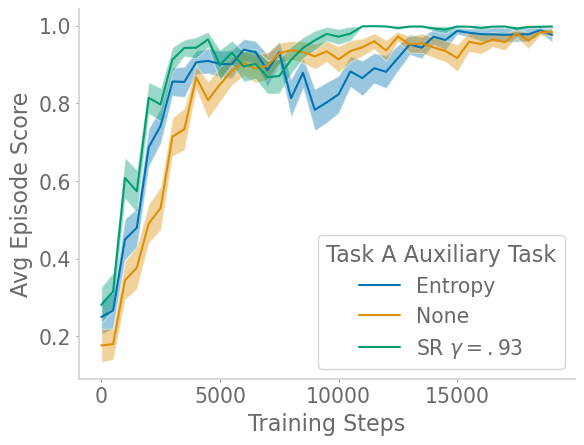

In [98]:
new_df = df.copy()
smooth_line = False
#new_df['epochs'] = new_df['epochs']//2*2
epochs = np.unique(new_df['epochs'])
fig, ax = plt.subplots()
colors = ['C2', 'darkgreen']
for fname_idx, fname in enumerate(
    np.unique(new_df['fname'])
    #['MB + Entropy', 'SR $\gamma=0.9$']
    ):
    means = []
    sems = []
    for epoch in epochs:
        vals = new_df[(new_df['fname']==fname) & (new_df['epochs']==epoch)]
        vals = vals['scores']
        means.append(np.mean(vals))
        sems.append(sem(vals))
    means = np.array(means)
    sems = np.array(sems)
    mean_lowerbound = means - sems
    mean_upperbound = means + sems
    if smooth_line:
        means = smooth(epochs, means, 3)
        mean_lowerbound = smooth(epochs, mean_lowerbound)
        mean_upperbound = smooth(epochs, mean_upperbound)
    ax.plot(epochs[:-1]*500, means[:-1], label=fname)#, color=colors[fname_idx])
    ax.fill_between(
        epochs[:-1]*500, mean_lowerbound[:-1], mean_upperbound[:-1],
        alpha=0.4)#, color=colors[fname_idx])
plt.ylabel('Avg Episode Score')
plt.xlabel('Training Steps')
plt.legend(title='Task A Auxiliary Task')
plt.show()

# SR Foraging Transfer

In [95]:
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/'

In [34]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/transfer_sr_dm_dim26/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(pfiles)

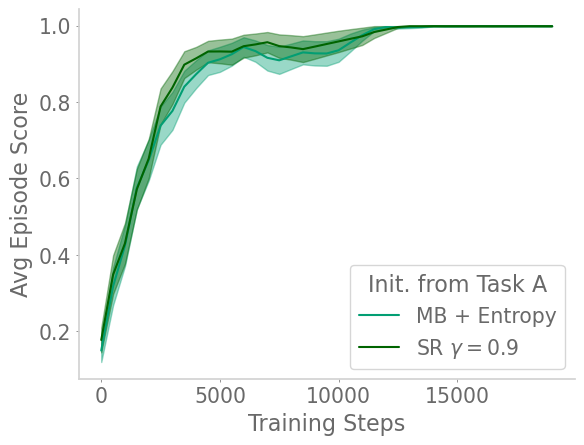

In [40]:
new_df = df.copy()
smooth_line = True
#new_df['epochs'] = new_df['epochs']//2*2
epochs = np.unique(new_df['epochs'])
fig, ax = plt.subplots()
colors = ['C2', 'darkgreen']
for fname_idx, fname in enumerate([
    'MB + Entropy', 'SR $\gamma=0.9$'
    ]):
    means = []
    sems = []
    for epoch in epochs:
        vals = new_df[(new_df['fname']==fname) & (new_df['epochs']==epoch)]
        vals = vals['scores']
        means.append(np.mean(vals))
        sems.append(sem(vals))
    means = np.array(means)
    sems = np.array(sems)
    mean_lowerbound = means - sems
    mean_upperbound = means + sems
    if smooth_line:
        means = smooth(epochs, means, 3)
        mean_lowerbound = smooth(epochs, mean_lowerbound)
        mean_upperbound = smooth(epochs, mean_upperbound)
    ax.plot(epochs[:-1]*500, means[:-1], label=fname, color=colors[fname_idx])
    ax.fill_between(
        epochs[:-1]*500, mean_lowerbound[:-1], mean_upperbound[:-1],
        alpha=0.4, color=colors[fname_idx])
plt.ylabel('Avg Episode Score')
plt.xlabel('Training Steps')
plt.legend(title='Init. from Task A')
plt.show()

# Foraging Transfer

In [99]:
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/'

In [128]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/transfer_srSize_dm_dim24/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(pfiles)

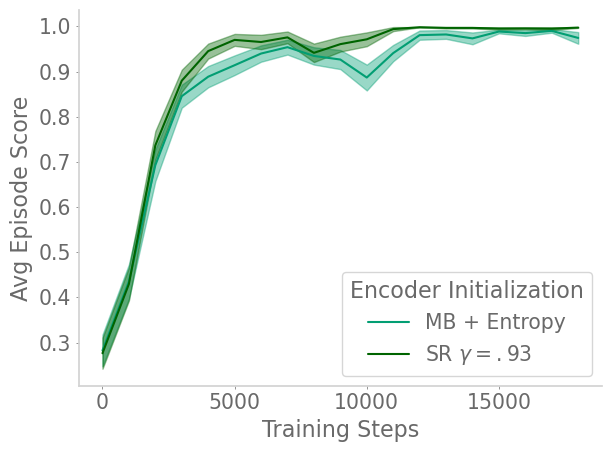

In [133]:
new_df = df.copy()
smooth_line = False
new_df['epochs'] = new_df['epochs']//2*2
epochs = np.unique(new_df['epochs'])
fig, ax = plt.subplots()
colors = ['C2', 'darkgreen']
for fname_idx, fname in enumerate(
    #np.unique(new_df['fname'])
    ['MB + Entropy', 'SR $\gamma=.93$']
    ):
    means = []
    sems = []
    for epoch in epochs:
        vals = new_df[(new_df['fname']==fname) & (new_df['epochs']==epoch)]
        vals = vals['scores']
        means.append(np.mean(vals))
        sems.append(sem(vals))
    means = np.array(means)
    sems = np.array(sems)
    mean_lowerbound = means - sems
    mean_upperbound = means + sems
    if smooth_line:
        means = smooth(epochs, means, 3)
        mean_lowerbound = smooth(epochs, mean_lowerbound)
        mean_upperbound = smooth(epochs, mean_upperbound)
    ax.plot(epochs[:-1]*500, means[:-1], label=fname, color=colors[fname_idx])
    ax.fill_between(
        epochs[:-1]*500, mean_lowerbound[:-1], mean_upperbound[:-1],
        alpha=0.4, color=colors[fname_idx])
plt.ylabel('Avg Episode Score')
plt.xlabel('Training Steps')
plt.xticks([0, 5000, 10000, 15000])
plt.legend(title='Encoder Initialization')
plt.tight_layout()
plt.savefig('sr_foraging_transfer.png', dpi=300)
plt.show()

In [66]:
from scipy.special import rel_entr

In [107]:
pickle_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/pickles/foraging_simplest_dim9/'
pfiles = []
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')

_results = {
    'dimensionality_tracking': [],
    'dimensionality_kl': [],
    'var_2d': [],
    'fname': []
    }
for pfile in pfiles:
    with open(pfile, 'rb') as f:
        results = pickle.load(f)
    n_fname = len(results['fname'])
    n_scores = len(results['valid_scores'])
    multiple = int(n_fname/n_scores)
    if n_fname % n_scores != 0:
        print('ERROR')
        print(pfile)
    idxs = np.arange(n_scores)
    for idx in idxs:
        var_ratio = results['dimensionality_variance_ratio'][idx]
        n_components = len(var_ratio)
        kl = sum(rel_entr(np.ones(n_components)/n_components, var_ratio))
        _results['dimensionality_tracking'].append(
            results['dimensionality_tracking'][idx])
        _results['dimensionality_kl'].append(kl)
        _results['var_2d'].append(np.sum(var_ratio[:2]))
        fname = results['fname'][idx*multiple]
        if 'mb_only' in fname:
            fname = 'MB only'
        elif 'mb' in fname:
            fname = 'MB'
        elif 'mf' in fname:
            fname = 'MF'
        elif 'entro' in fname:
            fname = 'Entro'
        elif 'clean' in fname:
            fname = 'Random'
        _results['fname'].append(fname)
for key in _results.keys():
    _results[key] = np.array(_results[key])
results = _results

In [108]:
df = pd.DataFrame(results)

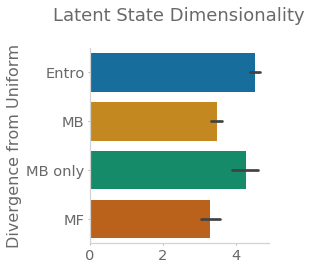

In [109]:
plt.figure(figsize=(6.4*0.5, 4.8*0.75))
sns.barplot(
    y='fname', x='dimensionality_kl', data=df,
    hue_order=['Random', 'MF', 'MB only', 'Entro', 'MB']
    )
plt.ylabel('Divergence from Uniform')
plt.xlabel('')
plt.title('Latent State Dimensionality\n', fontsize=18)
#plt.xticks([0, 1, 2], ['MF', 'MF + S', 'MF + S + MB'], rotation=30)
plt.show()

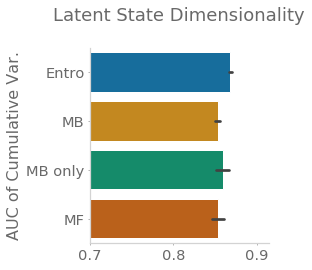

In [110]:
plt.figure(figsize=(6.4*0.5, 4.8*0.75))
sns.barplot(
    y='fname', x='dimensionality_tracking', data=df,
    hue_order=['Random', 'MF', 'MB only', 'Entro', 'MB']
    )
plt.ylabel('AUC of Cumulative Var.')
plt.xlabel('')
plt.title('Latent State Dimensionality\n', fontsize=18)
plt.xlim(left=0.7)
#plt.xticks([0, 1, 2], ['MF', 'MF + S', 'MF + S + MB'], rotation=30)
plt.show()

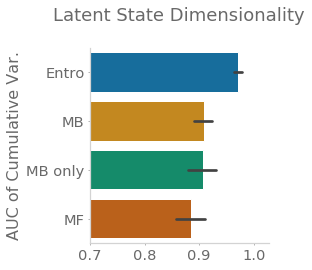

In [114]:
plt.figure(figsize=(6.4*0.5, 4.8*0.75))
sns.barplot(
    y='fname', x='var_2d', data=df,
    hue_order=['Random', 'MF', 'MB only', 'Entro', 'MB']
    )
plt.ylabel('AUC of Cumulative Var.')
plt.xlabel('')
plt.title('Latent State Dimensionality\n', fontsize=18)
plt.xlim(left=0.7)
#plt.xticks([0, 1, 2], ['MF', 'MF + S', 'MF + S + MB'], rotation=30)
plt.show()